<a href="https://colab.research.google.com/github/navneetkrc/fastai_v2/blob/master/SHAP_in_FASTAI2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
!pip install -q fastai2 fastcore feather-format kornia pyarrow wandb nbdev fastprogress --upgrade 
!pip install torchvision===0.4.2
!pip install Pillow==6.2.1 --upgrade
!pip install torch==1.3.1
os._exit(00)

##FASTSHAP

In [0]:
#Install non-standard packages (assuming jupyter notebook)
!pip install shap
!pip install lime
!pip install eli5


In [0]:
#eli5 package (https://eli5.readthedocs.io/en/latest)
import eli5
from eli5.sklearn import PermutationImportance

#lime package (https://github.com/marcotcr/lime)
import lime
import lime.lime_tabular

#shap package (https://github.com/slundberg/shap)
import shap

In [0]:
!pip install fastshap

In [0]:
from fastai2.tabular.all import *

First we'll quickly train a ADULTS tabular model

In [0]:
path = untar_data(URLs.ADULT_SAMPLE)
df = pd.read_csv(path/'adult.csv')

In [0]:
dep_var = 'salary'
cat_names = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race']
cont_names = ['age', 'fnlwgt', 'education-num']
procs = [Categorify, FillMissing, Normalize]

In [0]:
splits = IndexSplitter(list(range(800,1000)))(range_of(df))
to = TabularPandas(df, procs, cat_names, cont_names, y_names="salary", splits=splits)
dls = to.dataloaders()

In [25]:
learn_adults = tabular_learner(dls, layers=[200,100], metrics=accuracy)
learn_adults.fit(2, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.370176,0.461458,0.830000,00:11
1,0.362068,0.357836,0.830000,00:11


In [0]:
#And now for some example usage!
from fastshap.interp import *

In [27]:
exp = ShapInterpretation(learn_adults, df.iloc[:100])

Classification model detected, displaying score for the class <50k.
(use `class_id` to specify another class)


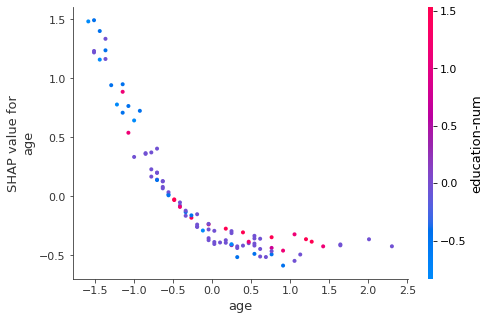

In [28]:
exp.dependence_plot('age')

Classification model detected, displaying score for the class <50k.
(use `class_id` to specify another class)


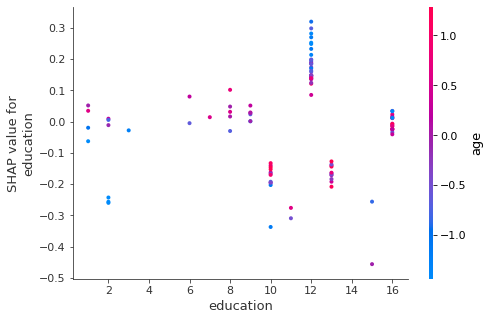

In [29]:
exp.dependence_plot('education')

Classification model detected, displaying score for the class >=50k.
(use `class_id` to specify another class)
Displaying row 10 of 100 (use `row_idx` to specify another row)


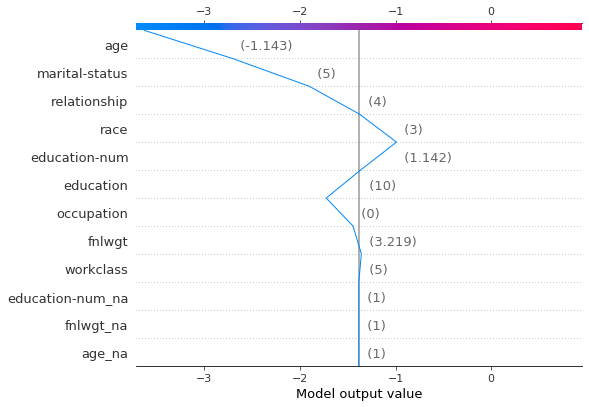

In [30]:
exp.decision_plot(class_id=1, row_idx=10)

Classification model detected, displaying score for the class <50k.
(use `class_id` to specify another class)


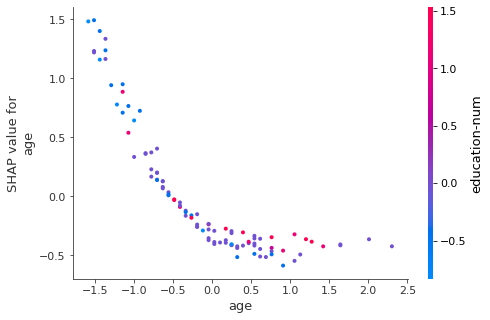

In [31]:
exp.dependence_plot('age', class_id=0)

In [32]:
exp.force_plot(class_id=0)

Classification model detected, displaying score for the class <50k.
(use `class_id` to specify another class)


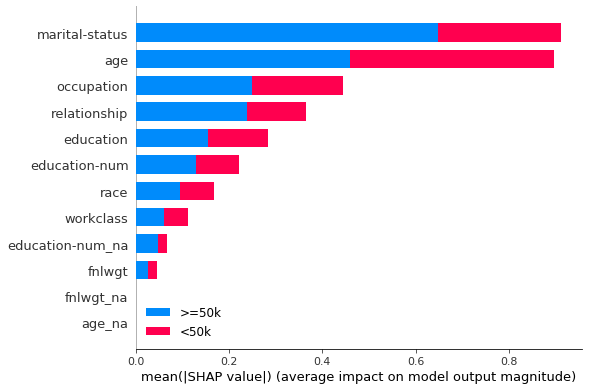

In [33]:
exp.summary_plot()

Classification model detected, displaying score for the class <50k.
(use `class_id` to specify another class)
Displaying row 10 of 100 (use `row_idx` to specify another row)


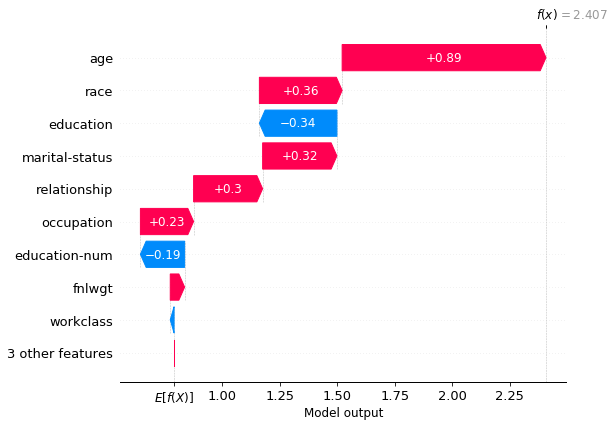

In [34]:
exp.waterfall_plot(row_idx=10)